In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [4]:
a = ASODataset(single_graph_batch)
train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\Haoyu Fan\Desktop\GNN\GNN_enantioselectivity\runs\..\ASOhelpers.py:133: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


In [7]:
device = torch.device('cuda')
model = GNNModel_sg_edge_attr(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=3, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.5091, Test Loss: 0.5327, Train MAE: 0.1288, Test MAE: 0.1360, , Train R2: 0.0242, Test R2: 0.0353
Epoch: 002, Train Loss: 0.5083, Test Loss: 0.5322, Train MAE: 0.1274, Test MAE: 0.1351, , Train R2: 0.0354, Test R2: 0.0415
Epoch: 003, Train Loss: 0.5093, Test Loss: 0.5312, Train MAE: 0.1296, Test MAE: 0.1355, , Train R2: 0.0213, Test R2: 0.0573
Epoch: 004, Train Loss: 0.5070, Test Loss: 0.5301, Train MAE: 0.1257, Test MAE: 0.1331, , Train R2: 0.0537, Test R2: 0.0703
Epoch: 005, Train Loss: 0.5105, Test Loss: 0.5378, Train MAE: 0.1193, Test MAE: 0.1311, , Train R2: 0.0041, Test R2: -0.0303
Epoch: 006, Train Loss: 0.5041, Test Loss: 0.5286, Train MAE: 0.1187, Test MAE: 0.1282, , Train R2: 0.0907, Test R2: 0.0857
Epoch: 007, Train Loss: 0.5005, Test Loss: 0.5243, Train MAE: 0.1148, Test MAE: 0.1239, , Train R2: 0.1403, Test R2: 0.1402
Epoch: 008, Train Loss: 0.4954, Test Loss: 0.5260, Train MAE: 0.1155, Test MAE: 0.1308, , Train R2: 0.2247, Test R2: 0.1184
Epoch: 

array([0.44873533, 0.0389479 , 0.87768001, 0.47036949, 0.04732379,
       0.85567624])

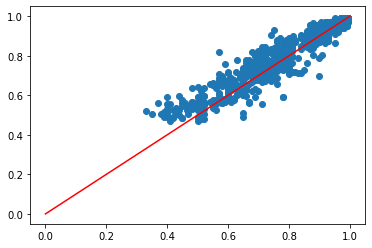

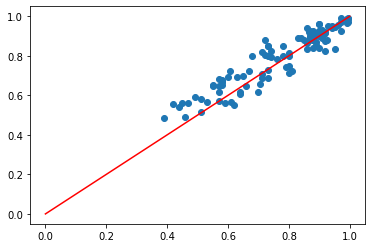

In [8]:
t = Trainer(model, device, optimizer, scheduler, glob_v= False)
t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)